<a href="https://colab.research.google.com/github/anilbhatt1/Deep_Learning_EVA4_Phase2/blob/master/EVA4P2_S3_Facial_Landmark_Detection_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

Sat Aug 15 14:21:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!python --version

Python 3.6.9


In [6]:
import dlib
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Downloaded renderFace.py file from https://github.com/Urviagrawal/Facial-Landmark-Detector/blob/master/renderFace.py and then manually uploaded the file to colab

In [18]:
from renderFace import renderFace

In [8]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap']     = 'gray'

In [11]:
def writeLandmarksToFile(landmarks, landmarksFilename):
    with open(landmarksFilename, 'w') as f:
         for p in landmarks.parts():
             f.write('%s%s\n' %(int(p.x), int(p.y))) 
    f.close()    

#### Landmark Model Location

In [12]:
Model_Path = '/content/'
Predictor_Path = Model_Path + 'shape_predictor_68_face_landmarks.dat'

#### Downloading & Unzipping 68-point landmark model

In [13]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2020-08-15 14:40:58--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.1MB/s    in 5.8s    

2020-08-15 14:41:04 (10.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



#### Initializing face detector.Dlib has a built-in face detector which can be accessed using get_frontal_face_detector().

In [14]:
faceDetector = dlib.get_frontal_face_detector()

#### Initialize landmark predictor (a.k.a dlib shape_predictor).The shape_predictor class implements Dlib’s facial landmark detector. 

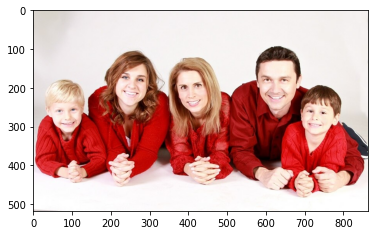

In [24]:
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(Predictor_Path)

# Read image. Prior to this family.jpg needs to be uploaded manually to colab
imageFilename = '/content/family.jpg'
im = cv2.imread(imageFilename)

# landmarks will be stored in results/family_i.txt. Manually create 'results' folder in colab
landmarksBasename = 'results/family'

# Display the original image
plt.imshow(im[:,:,::-1])
plt.show()

#### Detect Faces. First we will determine face rectangles by passing the image through dlib face detector

In [16]:
# Getting face rectangles
faceRects = faceDetector(im, 0)
print(f'Number of faces detected : {len(faceRects)}, {type(faceRects)}')

Number of faces detected : 5, <class 'dlib.rectangles'>


In [17]:
# List to store landmarks of all the faces detected
landmarksAll = []

###Detect landmarks for each faces
####Dlib’s landmark detector needs two inputs 1) Input Image 2) Face Rectangle


In [28]:
# Loop over all detected face rectangles from previous step
for i in range(0, len(faceRects)):
    newRect = dlib.rectangle(int(faceRects[i].left()),
                             int(faceRects[i].top()),
                             int(faceRects[i].right()),
                             int(faceRects[i].bottom()))
    # for every face rectangle run landmark detector
    face_landmarks = landmarkDetector(im, newRect)

    # print number of landmarks just to ensure the model we are using (68 vs 5)
    if i == 0:
      print(f'Number of Facial Landmarks detected: {len(face_landmarks.parts())}, {type(face_landmarks.parts())}')

    # Store landmarks for current face
    landmarksAll.append(face_landmarks)  

    # Next we render the outline of the face using detected landmarks
    renderFace(im, face_landmarks)

    # Save the results to results/family_i.txt. In the xample image used, results/family_0.txt -> results/family_4.txt
    landmarksFileName = landmarksBasename + '_' + str(i) + '.txt'
    print(f'Saving Landmark-{i} to {landmarksFileName}')

    # Writing the content to physical file
    writeLandmarksToFile(face_landmarks, landmarksFileName)

Number of Facial Landmarks detected: 68, <class 'dlib.points'>
Saving Landmark-0 to results/family_0.txt
Saving Landmark-1 to results/family_1.txt
Saving Landmark-2 to results/family_2.txt
Saving Landmark-3 to results/family_3.txt
Saving Landmark-4 to results/family_4.txt


#### The output image with landmarks is saved to  results/familyLandmarks.jpg. Please note that original image got converted while running the landmark detector in loop in above step

In [29]:
outputFileName = 'results/familyLandmarks.jpg'
cv2.imwrite(outputFileName, im)
print(f'Output Image with landmarks saved to {outputFileName}')

Output Image with landmarks saved to results/familyLandmarks.jpg


#### Displaying the image with landmarks

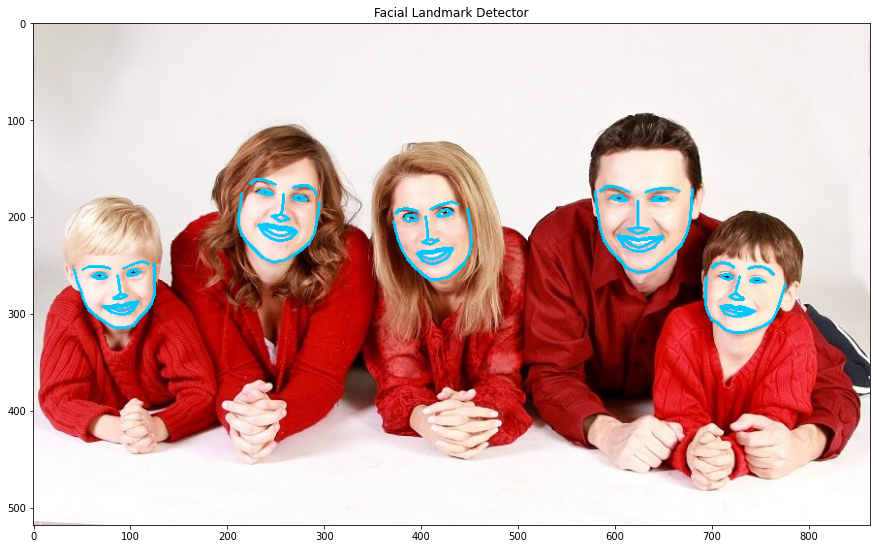

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.title('Facial Landmark Detector')
plt.show()

#### Sample code to 

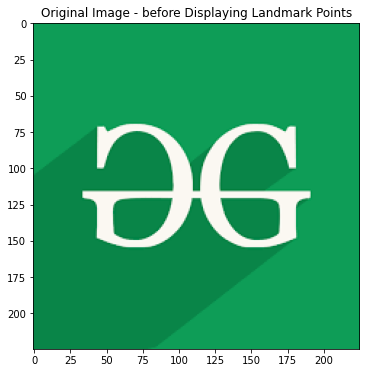

In [56]:
# Read image to show polylines example
imgFilename = '/content/Polylines_Sample_Img.jpg'
img = cv2.imread(imgFilename)
plt.figure(figsize=(6,6))
plt.imshow(img[:,:,::-1])
plt.title('Original Image - before Displaying Landmark Points')
plt.show()

In [58]:
isClosed = True
# Polygon corner points coordinates 
pts = np.array([[25, 70], [25, 160],  
                [110, 200], [200, 160],  
                [200, 70], [110, 20]], 
               np.int32) 
pts = pts.reshape((-1, 1, 2)) 
img = cv2.polylines(img, pts, isClosed, (255,255,0), thickness= 2, lineType=cv2.LINE_8)

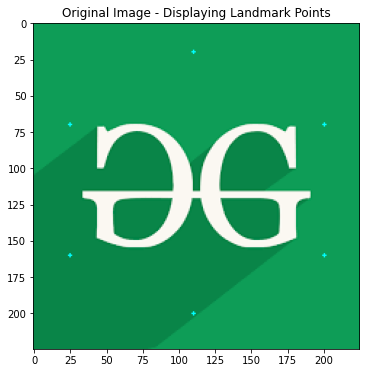

In [59]:
plt.figure(figsize=(6,6))
plt.imshow(img[:,:,::-1])
plt.title('Original Image - Displaying Landmark Points')
plt.show()